In [1]:
import numpy as np
import pylab as plt
from scipy import stats

In [2]:
goal = 50                   #kWh, goal for the system to reach
s_avg_cc = 0.3              # as decimal percentage of sky, average cloud cover
s_std_cc = 0.1              # as decimal percentage of sky, standard deviation cloud cover
s_irr = 7                   # kj/m2, solar irradiance
s_area = 100                # m2, solar panel area
ng_power = 70               # kW, natural gas power generation
ng_avg_uptime = 0.95        # as decimal percentage of an hour, average up-time of equipment
ng_std_uptime = 0.01        # as decimal percentage of an hour, standard deviation up-time of equipment
ng_emissions_per_kWh = 0.4127691    # emissions per kWh when an ng turbine is running
ng_startup_time = 4         # hours, time to start-up natural gas turbine
ng_shutdown_time = 2        # hours, time to shutdown natural gas turbine
reward_function = [0,50,100]

In [3]:
# Create Simulation
def simulation(actions):
    reward = []
    for idx, ng_on in enumerate(actions):
        s_kWh = (s_irr * stats.norm.pdf((idx-12)/2.738612788, 0, 1) / \
                stats.norm.pdf((12-12)/2.738612788, 0, 1) ) * \
                (1-np.random.normal(s_avg_cc, s_std_cc, 1)[0]) * s_area
        ng_kWh = ng_on * np.random.normal(ng_avg_uptime, ng_std_uptime,1)[0] * ng_power
        ng_emissions = ng_kWh * ng_emissions_per_kWh
        if s_kWh >= goal and ng_emissions < 1:
            r = reward_function[2]
        elif s_kWh + ng_kWh >= goal:
            r = reward_function[1]
        else:
            r = reward_function[0]
        reward.append(r)
    return reward

# Test Simulation
actions_guess = np.ones(24)
actions_guess *= -1
for i in range(24):
        actions_guess[i] = round(np.random.uniform(0,1),0)
        
actions_guess = [int(a) for a in actions_guess]
rewards = simulation(actions_guess)
print(rewards)

[50, 0, 0, 50, 0, 0, 0, 100, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 50, 50, 0, 50, 0, 0]


In [4]:
%%time

import itertools
state_space = list(itertools.product([0, 1], repeat=24))
len(state_space)

Wall time: 3.27 s


16777216

In [5]:
%%time

# takes 29 minutes to run

indexes = []
b = (1,0,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0,0,0,1)")
b = (1,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0,0,1)")
b = (1,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (1,0,1)")
b = (0,1,0)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (0,1,0)")
b = (0,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (0,0,0,1)")
b = (0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)

print("finished (0,0,1)")
b = (0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (0,1)")
b = (1,0)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0)")
indexes.sort()
indexes = set(indexes)
indexes = list(indexes)
print('number of invalid states:',len(indexes))
for i in reversed(indexes):
    state_space.pop(i)
    
print('number of valid states',len(state_space))
#state_space

finished (1,0,0,0,1)
finished (1,0,0,1)
finished (1,0,1)
finished (0,1,0)
finished (0,0,0,1)
finished (0,0,1)
finished (0,1)
finished (1,0)
number of invalid states: 16768878
number of valid states 8338
Wall time: 15min 57s


In [6]:
goal_mapping = []
for i in state_space:
    goal_mapping.append(simulation(i))
    
#goal_mapping

In [7]:
%%time
reward_matrix = []
num_iterations = 3
for i in range(num_iterations):
    reward = []
    for state in state_space:
        reward.append(round(sum(simulation(state)),1))

    reward_matrix.append(reward)

print(np.array(reward_matrix).shape)
print('average winner was:',np.argmax(np.average(reward_matrix,axis=0)),\
      'with simulation:',state_space[np.argmax(np.average(reward_matrix,axis=0))])
for i in range(len(reward_matrix)):
    print('round '+str(i+1),'winner was:',np.argmax(reward_matrix[i]),\
          'with simulation:',state_space[np.argmax(reward_matrix[i])])

(3, 8338)
average winner was: 7622 with simulation: (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 1 winner was: 7622 with simulation: (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 2 winner was: 7272 with simulation: (1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1)
round 3 winner was: 7265 with simulation: (1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
Wall time: 1min 18s


In [8]:
node_counter = 0
state_lookup = {}
for j in range(1,25):
    for i in state_space:
        if 'level'+str(j)+'_'+str(i[:j]) not in state_lookup:
            state_lookup['level'+str(j)+'_'+str(i[:j])] = node_counter
            node_counter += 1


states = []
for i in state_space:
    available_actions = []
    for j in range(1,25):
        available_actions.append(state_lookup['level'+str(j)+'_'+str(i[:j])])
    
    states.append(available_actions)


available_actions = []
term_nodes = [17924]
           
for i in states:
    for j in range(1,25):
        if j == 0:
            if (0,i[j]) not in available_actions:
                available_actions.append((0,i[j]))
        elif j == 24:   
            if (node_counter,0) not in available_actions and (node_counter,1) not in available_actions:
                available_actions.append((node_counter,0))
                available_actions.append((node_counter,1))
            else:
                term_nodes.append(i[-1])
        else:
            if (i[j-1],i[j]) not in available_actions:
                available_actions.append((i[j-1],i[j]))
            
#available_actions

In [9]:
points_list = available_actions

In [10]:
# how many points in graph? x points
MATRIX_SIZE = node_counter + 1

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [11]:
# assign zeros to paths and 100 to goal-reaching point
reward = -1
for point in points_list:
    print(point)
    for idx, term_node in enumerate(term_nodes):
        if point[0] == term_node or point[1] == term_node:
            reward = sum(goal_mapping[idx])
    
    if point[0] in term_nodes:
        R[point] = reward
    else:
        R[point] = 0

    if point[1] in term_nodes:
        R[point[::-1]] = reward
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
for idx, term_node in enumerate(term_nodes):
    R[term_node,term_node]= sum(goal_mapping[idx])

#R

(0, 2)
(2, 4)
(4, 7)
(7, 11)
(11, 17)
(17, 25)
(25, 37)
(37, 55)
(55, 82)
(82, 122)
(122, 181)
(181, 267)
(267, 392)
(392, 574)
(574, 840)
(840, 1230)
(1230, 1803)
(1803, 2645)
(2645, 3881)
(3881, 5693)
(5693, 8347)
(8347, 12233)
(12233, 17924)
(26262, 0)
(26262, 1)
(12233, 17925)
(8347, 12234)
(12234, 17926)
(5693, 8348)
(8348, 12235)
(12235, 17927)
(12235, 17928)
(3881, 5694)
(5694, 8349)
(8349, 12236)
(12236, 17929)
(8349, 12237)
(12237, 17930)
(12237, 17931)
(2645, 3882)
(3882, 5695)
(5695, 8350)
(8350, 12238)
(12238, 17932)
(5695, 8351)
(8351, 12239)
(12239, 17933)
(8351, 12240)
(12240, 17934)
(12240, 17935)
(1803, 2646)
(2646, 3883)
(3883, 5696)
(5696, 8352)
(8352, 12241)
(12241, 17936)
(3883, 5697)
(5697, 8353)
(8353, 12242)
(12242, 17937)
(5697, 8354)
(8354, 12243)
(12243, 17938)
(8354, 12244)
(12244, 17939)
(12244, 17940)
(1230, 1804)
(1804, 2647)
(2647, 3884)
(3884, 5698)
(5698, 8355)
(8355, 12245)
(12245, 17941)
(12245, 17942)
(2647, 3885)
(3885, 5699)
(5699, 8356)
(8356, 12

(2674, 3923)
(3923, 5755)
(5755, 8439)
(8439, 12369)
(12369, 18124)
(12369, 18125)
(8439, 12370)
(12370, 18126)
(5755, 8440)
(8440, 12371)
(12371, 18127)
(12371, 18128)
(3923, 5756)
(5756, 8441)
(8441, 12372)
(12372, 18129)
(8441, 12373)
(12373, 18130)
(12373, 18131)
(2674, 3924)
(3924, 5757)
(5757, 8442)
(8442, 12374)
(12374, 18132)
(5757, 8443)
(8443, 12375)
(12375, 18133)
(8443, 12376)
(12376, 18134)
(12376, 18135)
(581, 851)
(851, 1245)
(1245, 1824)
(1824, 2675)
(2675, 3925)
(3925, 5758)
(5758, 8444)
(8444, 12377)
(12377, 18136)
(12377, 18137)
(8444, 12378)
(12378, 18138)
(5758, 8445)
(8445, 12379)
(12379, 18139)
(12379, 18140)
(3925, 5759)
(5759, 8446)
(8446, 12380)
(12380, 18141)
(8446, 12381)
(12381, 18142)
(12381, 18143)
(851, 1246)
(1246, 1825)
(1825, 2676)
(2676, 3926)
(3926, 5760)
(5760, 8447)
(8447, 12382)
(12382, 18144)
(12382, 18145)
(8447, 12383)
(12383, 18146)
(5760, 8448)
(8448, 12384)
(12384, 18147)
(12384, 18148)
(1246, 1826)
(1826, 2677)
(2677, 3927)
(3927, 5761)
(5

(5824, 8540)
(8540, 12516)
(12516, 18338)
(5824, 8541)
(8541, 12517)
(12517, 18339)
(8541, 12518)
(12518, 18340)
(12518, 18341)
(859, 1258)
(1258, 1844)
(1844, 2705)
(2705, 3970)
(3970, 5825)
(5825, 8542)
(8542, 12519)
(12519, 18342)
(12519, 18343)
(8542, 12520)
(12520, 18344)
(1844, 2706)
(2706, 3971)
(3971, 5826)
(5826, 8543)
(8543, 12521)
(12521, 18345)
(12521, 18346)
(2706, 3972)
(3972, 5827)
(5827, 8544)
(8544, 12522)
(12522, 18347)
(3972, 5828)
(5828, 8545)
(8545, 12523)
(12523, 18348)
(5828, 8546)
(8546, 12524)
(12524, 18349)
(8546, 12525)
(12525, 18350)
(12525, 18351)
(185, 274)
(274, 402)
(402, 588)
(588, 860)
(860, 1259)
(1259, 1845)
(1845, 2707)
(2707, 3973)
(3973, 5829)
(5829, 8547)
(8547, 12526)
(12526, 18352)
(12526, 18353)
(8547, 12527)
(12527, 18354)
(5829, 8548)
(8548, 12528)
(12528, 18355)
(12528, 18356)
(3973, 5830)
(5830, 8549)
(8549, 12529)
(12529, 18357)
(8549, 12530)
(12530, 18358)
(12530, 18359)
(2707, 3974)
(3974, 5831)
(5831, 8550)
(8550, 12531)
(12531, 18360)

(8632, 12650)
(12650, 18532)
(12650, 18533)
(593, 868)
(868, 1271)
(1271, 1863)
(1863, 2734)
(2734, 4013)
(4013, 5888)
(5888, 8633)
(8633, 12651)
(12651, 18534)
(12651, 18535)
(8633, 12652)
(12652, 18536)
(5888, 8634)
(8634, 12653)
(12653, 18537)
(12653, 18538)
(1271, 1864)
(1864, 2735)
(2735, 4014)
(4014, 5889)
(5889, 8635)
(8635, 12654)
(12654, 18539)
(12654, 18540)
(8635, 12655)
(12655, 18541)
(1864, 2736)
(2736, 4015)
(4015, 5890)
(5890, 8636)
(8636, 12656)
(12656, 18542)
(12656, 18543)
(2736, 4016)
(4016, 5891)
(5891, 8637)
(8637, 12657)
(12657, 18544)
(4016, 5892)
(5892, 8638)
(8638, 12658)
(12658, 18545)
(5892, 8639)
(8639, 12659)
(12659, 18546)
(8639, 12660)
(12660, 18547)
(12660, 18548)
(126, 188)
(188, 277)
(277, 406)
(406, 594)
(594, 869)
(869, 1272)
(1272, 1865)
(1865, 2737)
(2737, 4017)
(4017, 5893)
(5893, 8640)
(8640, 12661)
(12661, 18549)
(12661, 18550)
(8640, 12662)
(12662, 18551)
(5893, 8641)
(8641, 12663)
(12663, 18552)
(12663, 18553)
(4017, 5894)
(5894, 8642)
(8642, 

(8734, 12800)
(12800, 18753)
(5957, 8735)
(8735, 12801)
(12801, 18754)
(12801, 18755)
(1286, 1886)
(1886, 2767)
(2767, 4061)
(4061, 5958)
(5958, 8736)
(8736, 12802)
(12802, 18756)
(12802, 18757)
(8736, 12803)
(12803, 18758)
(1886, 2768)
(2768, 4062)
(4062, 5959)
(5959, 8737)
(8737, 12804)
(12804, 18759)
(12804, 18760)
(2768, 4063)
(4063, 5960)
(5960, 8738)
(8738, 12805)
(12805, 18761)
(4063, 5961)
(5961, 8739)
(8739, 12806)
(12806, 18762)
(5961, 8740)
(8740, 12807)
(12807, 18763)
(8740, 12808)
(12808, 18764)
(12808, 18765)
(57, 86)
(86, 128)
(128, 190)
(190, 280)
(280, 411)
(411, 601)
(601, 879)
(879, 1287)
(1287, 1887)
(1887, 2769)
(2769, 4064)
(4064, 5962)
(5962, 8741)
(8741, 12809)
(12809, 18766)
(12809, 18767)
(8741, 12810)
(12810, 18768)
(5962, 8742)
(8742, 12811)
(12811, 18769)
(12811, 18770)
(4064, 5963)
(5963, 8743)
(8743, 12812)
(12812, 18771)
(8743, 12813)
(12813, 18772)
(12813, 18773)
(2769, 4065)
(4065, 5964)
(5964, 8744)
(8744, 12814)
(12814, 18774)
(5964, 8745)
(8745, 128

(6032, 8843)
(8843, 12956)
(12956, 18979)
(8843, 12957)
(12957, 18980)
(12957, 18981)
(888, 1301)
(1301, 1908)
(1908, 2801)
(2801, 4112)
(4112, 6033)
(6033, 8844)
(8844, 12958)
(12958, 18982)
(12958, 18983)
(8844, 12959)
(12959, 18984)
(6033, 8845)
(8845, 12960)
(12960, 18985)
(12960, 18986)
(1301, 1909)
(1909, 2802)
(2802, 4113)
(4113, 6034)
(6034, 8846)
(8846, 12961)
(12961, 18987)
(12961, 18988)
(8846, 12962)
(12962, 18989)
(1909, 2803)
(2803, 4114)
(4114, 6035)
(6035, 8847)
(8847, 12963)
(12963, 18990)
(12963, 18991)
(2803, 4115)
(4115, 6036)
(6036, 8848)
(8848, 12964)
(12964, 18992)
(4115, 6037)
(6037, 8849)
(8849, 12965)
(12965, 18993)
(6037, 8850)
(8850, 12966)
(12966, 18994)
(8850, 12967)
(12967, 18995)
(12967, 18996)
(17, 26)
(26, 39)
(39, 58)
(58, 87)
(87, 130)
(130, 193)
(193, 284)
(284, 416)
(416, 608)
(608, 889)
(889, 1302)
(1302, 1910)
(1910, 2804)
(2804, 4116)
(4116, 6038)
(6038, 8851)
(8851, 12968)
(12968, 18997)
(12968, 18998)
(8851, 12969)
(12969, 18999)
(6038, 8852)


(8935, 13092)
(13092, 19180)
(13092, 19181)
(8935, 13093)
(13093, 19182)
(1929, 2832)
(2832, 4156)
(4156, 6096)
(6096, 8936)
(8936, 13094)
(13094, 19183)
(13094, 19184)
(2832, 4157)
(4157, 6097)
(6097, 8937)
(8937, 13095)
(13095, 19185)
(4157, 6098)
(6098, 8938)
(8938, 13096)
(13096, 19186)
(6098, 8939)
(8939, 13097)
(13097, 19187)
(8939, 13098)
(13098, 19188)
(13098, 19189)
(613, 898)
(898, 1316)
(1316, 1930)
(1930, 2833)
(2833, 4158)
(4158, 6099)
(6099, 8940)
(8940, 13099)
(13099, 19190)
(13099, 19191)
(8940, 13100)
(13100, 19192)
(6099, 8941)
(8941, 13101)
(13101, 19193)
(13101, 19194)
(1316, 1931)
(1931, 2834)
(2834, 4159)
(4159, 6100)
(6100, 8942)
(8942, 13102)
(13102, 19195)
(13102, 19196)
(8942, 13103)
(13103, 19197)
(1931, 2835)
(2835, 4160)
(4160, 6101)
(6101, 8943)
(8943, 13104)
(13104, 19198)
(13104, 19199)
(2835, 4161)
(4161, 6102)
(6102, 8944)
(8944, 13105)
(13105, 19200)
(4161, 6103)
(6103, 8945)
(8945, 13106)
(13106, 19201)
(6103, 8946)
(8946, 13107)
(13107, 19202)
(8946

(6160, 9027)
(9027, 13226)
(13226, 19379)
(4202, 6161)
(6161, 9028)
(9028, 13227)
(13227, 19380)
(6161, 9029)
(9029, 13228)
(13228, 19381)
(9029, 13229)
(13229, 19382)
(13229, 19383)
(133, 197)
(197, 289)
(289, 423)
(423, 619)
(619, 907)
(907, 1330)
(1330, 1952)
(1952, 2865)
(2865, 4203)
(4203, 6162)
(6162, 9030)
(9030, 13230)
(13230, 19384)
(13230, 19385)
(9030, 13231)
(13231, 19386)
(6162, 9031)
(9031, 13232)
(13232, 19387)
(13232, 19388)
(4203, 6163)
(6163, 9032)
(9032, 13233)
(13233, 19389)
(9032, 13234)
(13234, 19390)
(13234, 19391)
(2865, 4204)
(4204, 6164)
(6164, 9033)
(9033, 13235)
(13235, 19392)
(6164, 9034)
(9034, 13236)
(13236, 19393)
(9034, 13237)
(13237, 19394)
(13237, 19395)
(1952, 2866)
(2866, 4205)
(4205, 6165)
(6165, 9035)
(9035, 13238)
(13238, 19396)
(4205, 6166)
(6166, 9036)
(9036, 13239)
(13239, 19397)
(6166, 9037)
(9037, 13240)
(13240, 19398)
(9037, 13241)
(13241, 19399)
(13241, 19400)
(1330, 1953)
(1953, 2867)
(2867, 4206)
(4206, 6167)
(6167, 9038)
(9038, 13242)
(

(13389, 19616)
(13389, 19617)
(428, 627)
(627, 918)
(918, 1346)
(1346, 1975)
(1975, 2899)
(2899, 4253)
(4253, 6236)
(6236, 9139)
(9139, 13390)
(13390, 19618)
(13390, 19619)
(9139, 13391)
(13391, 19620)
(6236, 9140)
(9140, 13392)
(13392, 19621)
(13392, 19622)
(4253, 6237)
(6237, 9141)
(9141, 13393)
(13393, 19623)
(9141, 13394)
(13394, 19624)
(13394, 19625)
(2899, 4254)
(4254, 6238)
(6238, 9142)
(9142, 13395)
(13395, 19626)
(6238, 9143)
(9143, 13396)
(13396, 19627)
(9143, 13397)
(13397, 19628)
(13397, 19629)
(627, 919)
(919, 1347)
(1347, 1976)
(1976, 2900)
(2900, 4255)
(4255, 6239)
(6239, 9144)
(9144, 13398)
(13398, 19630)
(13398, 19631)
(9144, 13399)
(13399, 19632)
(6239, 9145)
(9145, 13400)
(13400, 19633)
(13400, 19634)
(4255, 6240)
(6240, 9146)
(9146, 13401)
(13401, 19635)
(9146, 13402)
(13402, 19636)
(13402, 19637)
(919, 1348)
(1348, 1977)
(1977, 2901)
(2901, 4256)
(4256, 6241)
(6241, 9147)
(9147, 13403)
(13403, 19638)
(13403, 19639)
(9147, 13404)
(13404, 19640)
(6241, 9148)
(9148, 1

(4296, 6299)
(6299, 9233)
(9233, 13530)
(13530, 19826)
(13530, 19827)
(9233, 13531)
(13531, 19828)
(1997, 2930)
(2930, 4297)
(4297, 6300)
(6300, 9234)
(9234, 13532)
(13532, 19829)
(13532, 19830)
(2930, 4298)
(4298, 6301)
(6301, 9235)
(9235, 13533)
(13533, 19831)
(4298, 6302)
(6302, 9236)
(9236, 13534)
(13534, 19832)
(6302, 9237)
(9237, 13535)
(13535, 19833)
(9237, 13536)
(13536, 19834)
(13536, 19835)
(200, 295)
(295, 433)
(433, 634)
(634, 929)
(929, 1362)
(1362, 1998)
(1998, 2931)
(2931, 4299)
(4299, 6303)
(6303, 9238)
(9238, 13537)
(13537, 19836)
(13537, 19837)
(9238, 13538)
(13538, 19838)
(6303, 9239)
(9239, 13539)
(13539, 19839)
(13539, 19840)
(4299, 6304)
(6304, 9240)
(9240, 13540)
(13540, 19841)
(9240, 13541)
(13541, 19842)
(13541, 19843)
(2931, 4300)
(4300, 6305)
(6305, 9241)
(9241, 13542)
(13542, 19844)
(6305, 9242)
(9242, 13543)
(13543, 19845)
(9242, 13544)
(13544, 19846)
(13544, 19847)
(1998, 2932)
(2932, 4301)
(4301, 6306)
(6306, 9243)
(9243, 13545)
(13545, 19848)
(4301, 6307

(6370, 9336)
(9336, 13681)
(13681, 20049)
(9336, 13682)
(13682, 20050)
(13682, 20051)
(939, 1378)
(1378, 2021)
(2021, 2964)
(2964, 4346)
(4346, 6371)
(6371, 9337)
(9337, 13683)
(13683, 20052)
(13683, 20053)
(9337, 13684)
(13684, 20054)
(6371, 9338)
(9338, 13685)
(13685, 20055)
(13685, 20056)
(1378, 2022)
(2022, 2965)
(2965, 4347)
(4347, 6372)
(6372, 9339)
(9339, 13686)
(13686, 20057)
(13686, 20058)
(9339, 13687)
(13687, 20059)
(2022, 2966)
(2966, 4348)
(4348, 6373)
(6373, 9340)
(9340, 13688)
(13688, 20060)
(13688, 20061)
(2966, 4349)
(4349, 6374)
(6374, 9341)
(9341, 13689)
(13689, 20062)
(4349, 6375)
(6375, 9342)
(9342, 13690)
(13690, 20063)
(6375, 9343)
(9343, 13691)
(13691, 20064)
(9343, 13692)
(13692, 20065)
(13692, 20066)
(93, 138)
(138, 203)
(203, 298)
(298, 437)
(437, 641)
(641, 940)
(940, 1379)
(1379, 2023)
(2023, 2967)
(2967, 4350)
(4350, 6376)
(6376, 9344)
(9344, 13693)
(13693, 20067)
(13693, 20068)
(9344, 13694)
(13694, 20069)
(6376, 9345)
(9345, 13695)
(13695, 20070)
(13695,

(13833, 20270)
(4396, 6444)
(6444, 9442)
(9442, 13834)
(13834, 20271)
(6444, 9443)
(9443, 13835)
(13835, 20272)
(9443, 13836)
(13836, 20273)
(13836, 20274)
(441, 647)
(647, 949)
(949, 1392)
(1392, 2043)
(2043, 2998)
(2998, 4397)
(4397, 6445)
(6445, 9444)
(9444, 13837)
(13837, 20275)
(13837, 20276)
(9444, 13838)
(13838, 20277)
(6445, 9445)
(9445, 13839)
(13839, 20278)
(13839, 20279)
(4397, 6446)
(6446, 9446)
(9446, 13840)
(13840, 20280)
(9446, 13841)
(13841, 20281)
(13841, 20282)
(949, 1393)
(1393, 2044)
(2044, 2999)
(2999, 4398)
(4398, 6447)
(6447, 9447)
(9447, 13842)
(13842, 20283)
(13842, 20284)
(9447, 13843)
(13843, 20285)
(6447, 9448)
(9448, 13844)
(13844, 20286)
(13844, 20287)
(1393, 2045)
(2045, 3000)
(3000, 4399)
(4399, 6448)
(6448, 9449)
(9449, 13845)
(13845, 20288)
(13845, 20289)
(9449, 13846)
(13846, 20290)
(2045, 3001)
(3001, 4400)
(4400, 6449)
(6449, 9450)
(9450, 13847)
(13847, 20291)
(13847, 20292)
(3001, 4401)
(4401, 6450)
(6450, 9451)
(9451, 13848)
(13848, 20293)
(4401, 

(2062, 3025)
(3025, 4436)
(4436, 6503)
(6503, 9532)
(9532, 13970)
(13970, 20473)
(4436, 6504)
(6504, 9533)
(9533, 13971)
(13971, 20474)
(6504, 9534)
(9534, 13972)
(13972, 20475)
(9534, 13973)
(13973, 20476)
(13973, 20477)
(1406, 2063)
(2063, 3026)
(3026, 4437)
(4437, 6505)
(6505, 9535)
(9535, 13974)
(13974, 20478)
(13974, 20479)
(3026, 4438)
(4438, 6506)
(6506, 9536)
(9536, 13975)
(13975, 20480)
(4438, 6507)
(6507, 9537)
(9537, 13976)
(13976, 20481)
(6507, 9538)
(9538, 13977)
(13977, 20482)
(9538, 13978)
(13978, 20483)
(13978, 20484)
(959, 1407)
(1407, 2064)
(2064, 3027)
(3027, 4439)
(4439, 6508)
(6508, 9539)
(9539, 13979)
(13979, 20485)
(13979, 20486)
(9539, 13980)
(13980, 20487)
(2064, 3028)
(3028, 4440)
(4440, 6509)
(6509, 9540)
(9540, 13981)
(13981, 20488)
(13981, 20489)
(3028, 4441)
(4441, 6510)
(6510, 9541)
(9541, 13982)
(13982, 20490)
(4441, 6511)
(6511, 9542)
(9542, 13983)
(13983, 20491)
(6511, 9543)
(9543, 13984)
(13984, 20492)
(9543, 13985)
(13985, 20493)
(13985, 20494)
(207,

(14122, 20696)
(9636, 14123)
(14123, 20697)
(6574, 9637)
(9637, 14124)
(14124, 20698)
(14124, 20699)
(4484, 6575)
(6575, 9638)
(9638, 14125)
(14125, 20700)
(9638, 14126)
(14126, 20701)
(14126, 20702)
(3058, 4485)
(4485, 6576)
(6576, 9639)
(9639, 14127)
(14127, 20703)
(6576, 9640)
(9640, 14128)
(14128, 20704)
(9640, 14129)
(14129, 20705)
(14129, 20706)
(662, 971)
(971, 1423)
(1423, 2086)
(2086, 3059)
(3059, 4486)
(4486, 6577)
(6577, 9641)
(9641, 14130)
(14130, 20707)
(14130, 20708)
(9641, 14131)
(14131, 20709)
(6577, 9642)
(9642, 14132)
(14132, 20710)
(14132, 20711)
(4486, 6578)
(6578, 9643)
(9643, 14133)
(14133, 20712)
(9643, 14134)
(14134, 20713)
(14134, 20714)
(971, 1424)
(1424, 2087)
(2087, 3060)
(3060, 4487)
(4487, 6579)
(6579, 9644)
(9644, 14135)
(14135, 20715)
(14135, 20716)
(9644, 14136)
(14136, 20717)
(6579, 9645)
(9645, 14137)
(14137, 20718)
(14137, 20719)
(1424, 2088)
(2088, 3061)
(3061, 4488)
(4488, 6580)
(6580, 9646)
(9646, 14138)
(14138, 20720)
(14138, 20721)
(9646, 14139)

(982, 1439)
(1439, 2109)
(2109, 3092)
(3092, 4533)
(4533, 6646)
(6646, 9743)
(9743, 14281)
(14281, 20930)
(14281, 20931)
(9743, 14282)
(14282, 20932)
(6646, 9744)
(9744, 14283)
(14283, 20933)
(14283, 20934)
(4533, 6647)
(6647, 9745)
(9745, 14284)
(14284, 20935)
(9745, 14285)
(14285, 20936)
(14285, 20937)
(3092, 4534)
(4534, 6648)
(6648, 9746)
(9746, 14286)
(14286, 20938)
(6648, 9747)
(9747, 14287)
(14287, 20939)
(9747, 14288)
(14288, 20940)
(14288, 20941)
(670, 983)
(983, 1440)
(1440, 2110)
(2110, 3093)
(3093, 4535)
(4535, 6649)
(6649, 9748)
(9748, 14289)
(14289, 20942)
(14289, 20943)
(9748, 14290)
(14290, 20944)
(6649, 9749)
(9749, 14291)
(14291, 20945)
(14291, 20946)
(4535, 6650)
(6650, 9750)
(9750, 14292)
(14292, 20947)
(9750, 14293)
(14293, 20948)
(14293, 20949)
(983, 1441)
(1441, 2111)
(2111, 3094)
(3094, 4536)
(4536, 6651)
(6651, 9751)
(9751, 14294)
(14294, 20950)
(14294, 20951)
(9751, 14295)
(14295, 20952)
(6651, 9752)
(9752, 14296)
(14296, 20953)
(14296, 20954)
(1441, 2112)
(21

(3125, 4580)
(4580, 6712)
(6712, 9838)
(9838, 14421)
(14421, 21139)
(4580, 6713)
(6713, 9839)
(9839, 14422)
(14422, 21140)
(6713, 9840)
(9840, 14423)
(14423, 21141)
(9840, 14424)
(14424, 21142)
(14424, 21143)
(98, 145)
(145, 213)
(213, 313)
(313, 460)
(460, 676)
(676, 992)
(992, 1455)
(1455, 2133)
(2133, 3126)
(3126, 4581)
(4581, 6714)
(6714, 9841)
(9841, 14425)
(14425, 21144)
(14425, 21145)
(9841, 14426)
(14426, 21146)
(6714, 9842)
(9842, 14427)
(14427, 21147)
(14427, 21148)
(4581, 6715)
(6715, 9843)
(9843, 14428)
(14428, 21149)
(9843, 14429)
(14429, 21150)
(14429, 21151)
(3126, 4582)
(4582, 6716)
(6716, 9844)
(9844, 14430)
(14430, 21152)
(6716, 9845)
(9845, 14431)
(14431, 21153)
(9845, 14432)
(14432, 21154)
(14432, 21155)
(2133, 3127)
(3127, 4583)
(4583, 6717)
(6717, 9846)
(9846, 14433)
(14433, 21156)
(4583, 6718)
(6718, 9847)
(9847, 14434)
(14434, 21157)
(6718, 9848)
(9848, 14435)
(14435, 21158)
(9848, 14436)
(14436, 21159)
(14436, 21160)
(1455, 2134)
(2134, 3128)
(3128, 4584)
(4584

(9948, 14580)
(14580, 21370)
(4632, 6789)
(6789, 9949)
(9949, 14581)
(14581, 21371)
(6789, 9950)
(9950, 14582)
(14582, 21372)
(9950, 14583)
(14583, 21373)
(14583, 21374)
(316, 465)
(465, 683)
(683, 1002)
(1002, 1470)
(1470, 2156)
(2156, 3161)
(3161, 4633)
(4633, 6790)
(6790, 9951)
(9951, 14584)
(14584, 21375)
(14584, 21376)
(9951, 14585)
(14585, 21377)
(6790, 9952)
(9952, 14586)
(14586, 21378)
(14586, 21379)
(4633, 6791)
(6791, 9953)
(9953, 14587)
(14587, 21380)
(9953, 14588)
(14588, 21381)
(14588, 21382)
(3161, 4634)
(4634, 6792)
(6792, 9954)
(9954, 14589)
(14589, 21383)
(6792, 9955)
(9955, 14590)
(14590, 21384)
(9955, 14591)
(14591, 21385)
(14591, 21386)
(683, 1003)
(1003, 1471)
(1471, 2157)
(2157, 3162)
(3162, 4635)
(4635, 6793)
(6793, 9956)
(9956, 14592)
(14592, 21387)
(14592, 21388)
(9956, 14593)
(14593, 21389)
(6793, 9957)
(9957, 14594)
(14594, 21390)
(14594, 21391)
(4635, 6794)
(6794, 9958)
(9958, 14595)
(14595, 21392)
(9958, 14596)
(14596, 21393)
(14596, 21394)
(1003, 1472)
(14

(6861, 10058)
(10058, 14743)
(14743, 21608)
(4680, 6862)
(6862, 10059)
(10059, 14744)
(14744, 21609)
(6862, 10060)
(10060, 14745)
(14745, 21610)
(10060, 14746)
(14746, 21611)
(14746, 21612)
(471, 692)
(692, 1014)
(1014, 1486)
(1486, 2178)
(2178, 3193)
(3193, 4681)
(4681, 6863)
(6863, 10061)
(10061, 14747)
(14747, 21613)
(14747, 21614)
(10061, 14748)
(14748, 21615)
(6863, 10062)
(10062, 14749)
(14749, 21616)
(14749, 21617)
(4681, 6864)
(6864, 10063)
(10063, 14750)
(14750, 21618)
(10063, 14751)
(14751, 21619)
(14751, 21620)
(3193, 4682)
(4682, 6865)
(6865, 10064)
(10064, 14752)
(14752, 21621)
(6865, 10065)
(10065, 14753)
(14753, 21622)
(10065, 14754)
(14754, 21623)
(14754, 21624)
(692, 1015)
(1015, 1487)
(1487, 2179)
(2179, 3194)
(3194, 4683)
(4683, 6866)
(6866, 10066)
(10066, 14755)
(14755, 21625)
(14755, 21626)
(10066, 14756)
(14756, 21627)
(6866, 10067)
(10067, 14757)
(14757, 21628)
(14757, 21629)
(4683, 6867)
(6867, 10068)
(10068, 14758)
(14758, 21630)
(10068, 14759)
(14759, 21631)
(

(1025, 1503)
(1503, 2203)
(2203, 3230)
(3230, 4736)
(4736, 6944)
(6944, 10179)
(10179, 14919)
(14919, 21864)
(14919, 21865)
(10179, 14920)
(14920, 21866)
(6944, 10180)
(10180, 14921)
(14921, 21867)
(14921, 21868)
(1503, 2204)
(2204, 3231)
(3231, 4737)
(4737, 6945)
(6945, 10181)
(10181, 14922)
(14922, 21869)
(14922, 21870)
(10181, 14923)
(14923, 21871)
(2204, 3232)
(3232, 4738)
(4738, 6946)
(6946, 10182)
(10182, 14924)
(14924, 21872)
(14924, 21873)
(3232, 4739)
(4739, 6947)
(6947, 10183)
(10183, 14925)
(14925, 21874)
(4739, 6948)
(6948, 10184)
(10184, 14926)
(14926, 21875)
(6948, 10185)
(10185, 14927)
(14927, 21876)
(10185, 14928)
(14928, 21877)
(14928, 21878)
(101, 150)
(150, 221)
(221, 325)
(325, 477)
(477, 700)
(700, 1026)
(1026, 1504)
(1504, 2205)
(2205, 3233)
(3233, 4740)
(4740, 6949)
(6949, 10186)
(10186, 14929)
(14929, 21879)
(14929, 21880)
(10186, 14930)
(14930, 21881)
(6949, 10187)
(10187, 14931)
(14931, 21882)
(14931, 21883)
(4740, 6950)
(6950, 10188)
(10188, 14932)
(14932, 21

(15056, 22062)
(15056, 22063)
(10274, 15057)
(15057, 22064)
(2222, 3260)
(3260, 4781)
(4781, 7010)
(7010, 10275)
(10275, 15058)
(15058, 22065)
(15058, 22066)
(3260, 4782)
(4782, 7011)
(7011, 10276)
(10276, 15059)
(15059, 22067)
(4782, 7012)
(7012, 10277)
(10277, 15060)
(15060, 22068)
(7012, 10278)
(10278, 15061)
(15061, 22069)
(10278, 15062)
(15062, 22070)
(15062, 22071)
(705, 1034)
(1034, 1516)
(1516, 2223)
(2223, 3261)
(3261, 4783)
(4783, 7013)
(7013, 10279)
(10279, 15063)
(15063, 22072)
(15063, 22073)
(10279, 15064)
(15064, 22074)
(7013, 10280)
(10280, 15065)
(15065, 22075)
(15065, 22076)
(1516, 2224)
(2224, 3262)
(3262, 4784)
(4784, 7014)
(7014, 10281)
(10281, 15066)
(15066, 22077)
(15066, 22078)
(10281, 15067)
(15067, 22079)
(2224, 3263)
(3263, 4785)
(4785, 7015)
(7015, 10282)
(10282, 15068)
(15068, 22080)
(15068, 22081)
(3263, 4786)
(4786, 7016)
(7016, 10283)
(10283, 15069)
(15069, 22082)
(4786, 7017)
(7017, 10284)
(10284, 15070)
(15070, 22083)
(7017, 10285)
(10285, 15071)
(15071

(3292, 4827)
(4827, 7074)
(7074, 10366)
(10366, 15190)
(15190, 22261)
(4827, 7075)
(7075, 10367)
(10367, 15191)
(15191, 22262)
(7075, 10368)
(10368, 15192)
(15192, 22263)
(10368, 15193)
(15193, 22264)
(15193, 22265)
(153, 226)
(226, 331)
(331, 485)
(485, 711)
(711, 1043)
(1043, 1530)
(1530, 2245)
(2245, 3293)
(3293, 4828)
(4828, 7076)
(7076, 10369)
(10369, 15194)
(15194, 22266)
(15194, 22267)
(10369, 15195)
(15195, 22268)
(7076, 10370)
(10370, 15196)
(15196, 22269)
(15196, 22270)
(4828, 7077)
(7077, 10371)
(10371, 15197)
(15197, 22271)
(10371, 15198)
(15198, 22272)
(15198, 22273)
(3293, 4829)
(4829, 7078)
(7078, 10372)
(10372, 15199)
(15199, 22274)
(7078, 10373)
(10373, 15200)
(15200, 22275)
(10373, 15201)
(15201, 22276)
(15201, 22277)
(2245, 3294)
(3294, 4830)
(4830, 7079)
(7079, 10374)
(10374, 15202)
(15202, 22278)
(4830, 7080)
(7080, 10375)
(10375, 15203)
(15203, 22279)
(7080, 10376)
(10376, 15204)
(15204, 22280)
(10376, 15205)
(15205, 22281)
(15205, 22282)
(1530, 2246)
(2246, 3295)

(10463, 15333)
(15333, 22470)
(7140, 10464)
(10464, 15334)
(15334, 22471)
(15334, 22472)
(1544, 2266)
(2266, 3323)
(3323, 4872)
(4872, 7141)
(7141, 10465)
(10465, 15335)
(15335, 22473)
(15335, 22474)
(10465, 15336)
(15336, 22475)
(2266, 3324)
(3324, 4873)
(4873, 7142)
(7142, 10466)
(10466, 15337)
(15337, 22476)
(15337, 22477)
(3324, 4874)
(4874, 7143)
(7143, 10467)
(10467, 15338)
(15338, 22478)
(4874, 7144)
(7144, 10468)
(10468, 15339)
(15339, 22479)
(7144, 10469)
(10469, 15340)
(15340, 22480)
(10469, 15341)
(15341, 22481)
(15341, 22482)
(227, 334)
(334, 490)
(490, 718)
(718, 1053)
(1053, 1545)
(1545, 2267)
(2267, 3325)
(3325, 4875)
(4875, 7145)
(7145, 10470)
(10470, 15342)
(15342, 22483)
(15342, 22484)
(10470, 15343)
(15343, 22485)
(7145, 10471)
(10471, 15344)
(15344, 22486)
(15344, 22487)
(4875, 7146)
(7146, 10472)
(10472, 15345)
(15345, 22488)
(10472, 15346)
(15346, 22489)
(15346, 22490)
(3325, 4876)
(4876, 7147)
(7147, 10473)
(10473, 15347)
(15347, 22491)
(7147, 10474)
(10474, 1534

(1558, 2286)
(2286, 3352)
(3352, 4914)
(4914, 7202)
(7202, 10554)
(10554, 15466)
(15466, 22666)
(15466, 22667)
(10554, 15467)
(15467, 22668)
(2286, 3353)
(3353, 4915)
(4915, 7203)
(7203, 10555)
(10555, 15468)
(15468, 22669)
(15468, 22670)
(3353, 4916)
(4916, 7204)
(7204, 10556)
(10556, 15469)
(15469, 22671)
(4916, 7205)
(7205, 10557)
(10557, 15470)
(15470, 22672)
(7205, 10558)
(10558, 15471)
(15471, 22673)
(10558, 15472)
(15472, 22674)
(15472, 22675)
(723, 1062)
(1062, 1559)
(1559, 2287)
(2287, 3354)
(3354, 4917)
(4917, 7206)
(7206, 10559)
(10559, 15473)
(15473, 22676)
(15473, 22677)
(10559, 15474)
(15474, 22678)
(7206, 10560)
(10560, 15475)
(15475, 22679)
(15475, 22680)
(1559, 2288)
(2288, 3355)
(3355, 4918)
(4918, 7207)
(7207, 10561)
(10561, 15476)
(15476, 22681)
(15476, 22682)
(10561, 15477)
(15477, 22683)
(2288, 3356)
(3356, 4919)
(4919, 7208)
(7208, 10562)
(10562, 15478)
(15478, 22684)
(15478, 22685)
(3356, 4920)
(4920, 7209)
(7209, 10563)
(10563, 15479)
(15479, 22686)
(4920, 7210

(4960, 7268)
(7268, 10649)
(10649, 15604)
(15604, 22868)
(4960, 7269)
(7269, 10650)
(10650, 15605)
(15605, 22869)
(7269, 10651)
(10651, 15606)
(15606, 22870)
(10651, 15607)
(15607, 22871)
(15607, 22872)
(3, 6)
(6, 9)
(9, 14)
(14, 21)
(21, 32)
(32, 48)
(48, 72)
(72, 107)
(107, 158)
(158, 232)
(232, 340)
(340, 498)
(498, 730)
(730, 1071)
(1071, 1572)
(1572, 2307)
(2307, 3384)
(3384, 4961)
(4961, 7270)
(7270, 10652)
(10652, 15608)
(15608, 22873)
(15608, 22874)
(10652, 15609)
(15609, 22875)
(7270, 10653)
(10653, 15610)
(15610, 22876)
(15610, 22877)
(4961, 7271)
(7271, 10654)
(10654, 15611)
(15611, 22878)
(10654, 15612)
(15612, 22879)
(15612, 22880)
(3384, 4962)
(4962, 7272)
(7272, 10655)
(10655, 15613)
(15613, 22881)
(7272, 10656)
(10656, 15614)
(15614, 22882)
(10656, 15615)
(15615, 22883)
(15615, 22884)
(2307, 3385)
(3385, 4963)
(4963, 7273)
(7273, 10657)
(10657, 15616)
(15616, 22885)
(4963, 7274)
(7274, 10658)
(10658, 15617)
(15617, 22886)
(7274, 10659)
(10659, 15618)
(15618, 22887)
(106

(15755, 23090)
(10751, 15756)
(15756, 23091)
(15756, 23092)
(1082, 1588)
(1588, 2329)
(2329, 3415)
(3415, 5006)
(5006, 7337)
(7337, 10752)
(10752, 15757)
(15757, 23093)
(15757, 23094)
(10752, 15758)
(15758, 23095)
(7337, 10753)
(10753, 15759)
(15759, 23096)
(15759, 23097)
(1588, 2330)
(2330, 3416)
(3416, 5007)
(5007, 7338)
(7338, 10754)
(10754, 15760)
(15760, 23098)
(15760, 23099)
(10754, 15761)
(15761, 23100)
(2330, 3417)
(3417, 5008)
(5008, 7339)
(7339, 10755)
(10755, 15762)
(15762, 23101)
(15762, 23102)
(3417, 5009)
(5009, 7340)
(7340, 10756)
(10756, 15763)
(15763, 23103)
(5009, 7341)
(7341, 10757)
(10757, 15764)
(15764, 23104)
(7341, 10758)
(10758, 15765)
(15765, 23105)
(10758, 15766)
(15766, 23106)
(15766, 23107)
(107, 159)
(159, 234)
(234, 343)
(343, 503)
(503, 738)
(738, 1083)
(1083, 1589)
(1589, 2331)
(2331, 3418)
(3418, 5010)
(5010, 7342)
(7342, 10759)
(10759, 15767)
(15767, 23108)
(15767, 23109)
(10759, 15768)
(15768, 23110)
(7342, 10760)
(10760, 15769)
(15769, 23111)
(15769,

(15913, 23318)
(15913, 23319)
(3448, 5057)
(5057, 7412)
(7412, 10861)
(10861, 15914)
(15914, 23320)
(5057, 7413)
(7413, 10862)
(10862, 15915)
(15915, 23321)
(7413, 10863)
(10863, 15916)
(15916, 23322)
(10863, 15917)
(15917, 23323)
(15917, 23324)
(347, 509)
(509, 745)
(745, 1092)
(1092, 1602)
(1602, 2351)
(2351, 3449)
(3449, 5058)
(5058, 7414)
(7414, 10864)
(10864, 15918)
(15918, 23325)
(15918, 23326)
(10864, 15919)
(15919, 23327)
(7414, 10865)
(10865, 15920)
(15920, 23328)
(15920, 23329)
(5058, 7415)
(7415, 10866)
(10866, 15921)
(15921, 23330)
(10866, 15922)
(15922, 23331)
(15922, 23332)
(3449, 5059)
(5059, 7416)
(7416, 10867)
(10867, 15923)
(15923, 23333)
(7416, 10868)
(10868, 15924)
(15924, 23334)
(10868, 15925)
(15925, 23335)
(15925, 23336)
(2351, 3450)
(3450, 5060)
(5060, 7417)
(7417, 10869)
(10869, 15926)
(15926, 23337)
(5060, 7418)
(7418, 10870)
(10870, 15927)
(15927, 23338)
(7418, 10871)
(10871, 15928)
(15928, 23339)
(10871, 15929)
(15929, 23340)
(15929, 23341)
(509, 746)
(746, 

(5110, 7491)
(7491, 10976)
(10976, 16080)
(16080, 23561)
(10976, 16081)
(16081, 23562)
(16081, 23563)
(3484, 5111)
(5111, 7492)
(7492, 10977)
(10977, 16082)
(16082, 23564)
(7492, 10978)
(10978, 16083)
(16083, 23565)
(10978, 16084)
(16084, 23566)
(16084, 23567)
(2374, 3485)
(3485, 5112)
(5112, 7493)
(7493, 10979)
(10979, 16085)
(16085, 23568)
(5112, 7494)
(7494, 10980)
(10980, 16086)
(16086, 23569)
(7494, 10981)
(10981, 16087)
(16087, 23570)
(10981, 16088)
(16088, 23571)
(16088, 23572)
(514, 753)
(753, 1103)
(1103, 1618)
(1618, 2375)
(2375, 3486)
(3486, 5113)
(5113, 7495)
(7495, 10982)
(10982, 16089)
(16089, 23573)
(16089, 23574)
(10982, 16090)
(16090, 23575)
(7495, 10983)
(10983, 16091)
(16091, 23576)
(16091, 23577)
(5113, 7496)
(7496, 10984)
(10984, 16092)
(16092, 23578)
(10984, 16093)
(16093, 23579)
(16093, 23580)
(3486, 5114)
(5114, 7497)
(7497, 10985)
(10985, 16094)
(16094, 23581)
(7497, 10986)
(10986, 16095)
(16095, 23582)
(10986, 16096)
(16096, 23583)
(16096, 23584)
(753, 1104)
(

(3514, 5153)
(5153, 7552)
(7552, 11065)
(11065, 16211)
(16211, 23754)
(16211, 23755)
(11065, 16212)
(16212, 23756)
(2395, 3515)
(3515, 5154)
(5154, 7553)
(7553, 11066)
(11066, 16213)
(16213, 23757)
(16213, 23758)
(3515, 5155)
(5155, 7554)
(7554, 11067)
(11067, 16214)
(16214, 23759)
(5155, 7555)
(7555, 11068)
(11068, 16215)
(16215, 23760)
(7555, 11069)
(11069, 16216)
(16216, 23761)
(11069, 16217)
(16217, 23762)
(16217, 23763)
(517, 758)
(758, 1112)
(1112, 1632)
(1632, 2396)
(2396, 3516)
(3516, 5156)
(5156, 7556)
(7556, 11070)
(11070, 16218)
(16218, 23764)
(16218, 23765)
(11070, 16219)
(16219, 23766)
(7556, 11071)
(11071, 16220)
(16220, 23767)
(16220, 23768)
(5156, 7557)
(7557, 11072)
(11072, 16221)
(16221, 23769)
(11072, 16222)
(16222, 23770)
(16222, 23771)
(1112, 1633)
(1633, 2397)
(2397, 3517)
(3517, 5157)
(5157, 7558)
(7558, 11073)
(11073, 16223)
(16223, 23772)
(16223, 23773)
(11073, 16224)
(16224, 23774)
(7558, 11074)
(11074, 16225)
(16225, 23775)
(16225, 23776)
(1633, 2398)
(2398, 

(11158, 16347)
(16347, 23952)
(16347, 23953)
(3543, 5197)
(5197, 7617)
(7617, 11159)
(11159, 16348)
(16348, 23954)
(7617, 11160)
(11160, 16349)
(16349, 23955)
(11160, 16350)
(16350, 23956)
(16350, 23957)
(2414, 3544)
(3544, 5198)
(5198, 7618)
(7618, 11161)
(11161, 16351)
(16351, 23958)
(5198, 7619)
(7619, 11162)
(11162, 16352)
(16352, 23959)
(7619, 11163)
(11163, 16353)
(16353, 23960)
(11163, 16354)
(16354, 23961)
(16354, 23962)
(1644, 2415)
(2415, 3545)
(3545, 5199)
(5199, 7620)
(7620, 11164)
(11164, 16355)
(16355, 23963)
(16355, 23964)
(3545, 5200)
(5200, 7621)
(7621, 11165)
(11165, 16356)
(16356, 23965)
(5200, 7622)
(7622, 11166)
(11166, 16357)
(16357, 23966)
(7622, 11167)
(11167, 16358)
(16358, 23967)
(11167, 16359)
(16359, 23968)
(16359, 23969)
(1120, 1645)
(1645, 2416)
(2416, 3546)
(3546, 5201)
(5201, 7623)
(7623, 11168)
(11168, 16360)
(16360, 23970)
(16360, 23971)
(11168, 16361)
(16361, 23972)
(2416, 3547)
(3547, 5202)
(5202, 7624)
(7624, 11169)
(11169, 16362)
(16362, 23973)
(16

(16491, 24164)
(16491, 24165)
(1131, 1660)
(1660, 2436)
(2436, 3574)
(3574, 5241)
(5241, 7682)
(7682, 11256)
(11256, 16492)
(16492, 24166)
(16492, 24167)
(11256, 16493)
(16493, 24168)
(7682, 11257)
(11257, 16494)
(16494, 24169)
(16494, 24170)
(1660, 2437)
(2437, 3575)
(3575, 5242)
(5242, 7683)
(7683, 11258)
(11258, 16495)
(16495, 24171)
(16495, 24172)
(11258, 16496)
(16496, 24173)
(2437, 3576)
(3576, 5243)
(5243, 7684)
(7684, 11259)
(11259, 16497)
(16497, 24174)
(16497, 24175)
(3576, 5244)
(5244, 7685)
(7685, 11260)
(11260, 16498)
(16498, 24176)
(5244, 7686)
(7686, 11261)
(11261, 16499)
(16499, 24177)
(7686, 11262)
(11262, 16500)
(16500, 24178)
(11262, 16501)
(16501, 24179)
(16501, 24180)
(112, 167)
(167, 246)
(246, 360)
(360, 527)
(527, 772)
(772, 1132)
(1132, 1661)
(1661, 2438)
(2438, 3577)
(3577, 5245)
(5245, 7687)
(7687, 11263)
(11263, 16502)
(16502, 24181)
(16502, 24182)
(11263, 16503)
(16503, 24183)
(7687, 11264)
(11264, 16504)
(16504, 24184)
(16504, 24185)
(5245, 7688)
(7688, 11

(3601, 5282)
(5282, 7742)
(7742, 11344)
(11344, 16620)
(16620, 24352)
(5282, 7743)
(7743, 11345)
(11345, 16621)
(16621, 24353)
(7743, 11346)
(11346, 16622)
(16622, 24354)
(11346, 16623)
(16623, 24355)
(16623, 24356)
(1671, 2454)
(2454, 3602)
(3602, 5283)
(5283, 7744)
(7744, 11347)
(11347, 16624)
(16624, 24357)
(16624, 24358)
(3602, 5284)
(5284, 7745)
(7745, 11348)
(11348, 16625)
(16625, 24359)
(5284, 7746)
(7746, 11349)
(11349, 16626)
(16626, 24360)
(7746, 11350)
(11350, 16627)
(16627, 24361)
(11350, 16628)
(16628, 24362)
(16628, 24363)
(1139, 1672)
(1672, 2455)
(2455, 3603)
(3603, 5285)
(5285, 7747)
(7747, 11351)
(11351, 16629)
(16629, 24364)
(16629, 24365)
(11351, 16630)
(16630, 24366)
(2455, 3604)
(3604, 5286)
(5286, 7748)
(7748, 11352)
(11352, 16631)
(16631, 24367)
(16631, 24368)
(3604, 5287)
(5287, 7749)
(7749, 11353)
(11353, 16632)
(16632, 24369)
(5287, 7750)
(7750, 11354)
(11354, 16633)
(16633, 24370)
(7750, 11355)
(11355, 16634)
(16634, 24371)
(11355, 16635)
(16635, 24372)
(166

(16766, 24564)
(16766, 24565)
(3634, 5331)
(5331, 7813)
(7813, 11446)
(11446, 16767)
(16767, 24566)
(5331, 7814)
(7814, 11447)
(11447, 16768)
(16768, 24567)
(7814, 11448)
(11448, 16769)
(16769, 24568)
(11448, 16770)
(16770, 24569)
(16770, 24570)
(170, 251)
(251, 367)
(367, 536)
(536, 784)
(784, 1149)
(1149, 1686)
(1686, 2476)
(2476, 3635)
(3635, 5332)
(5332, 7815)
(7815, 11449)
(11449, 16771)
(16771, 24571)
(16771, 24572)
(11449, 16772)
(16772, 24573)
(7815, 11450)
(11450, 16773)
(16773, 24574)
(16773, 24575)
(5332, 7816)
(7816, 11451)
(11451, 16774)
(16774, 24576)
(11451, 16775)
(16775, 24577)
(16775, 24578)
(3635, 5333)
(5333, 7817)
(7817, 11452)
(11452, 16776)
(16776, 24579)
(7817, 11453)
(11453, 16777)
(16777, 24580)
(11453, 16778)
(16778, 24581)
(16778, 24582)
(2476, 3636)
(3636, 5334)
(5334, 7818)
(7818, 11454)
(11454, 16779)
(16779, 24583)
(5334, 7819)
(7819, 11455)
(11455, 16780)
(16780, 24584)
(7819, 11456)
(11456, 16781)
(16781, 24585)
(11456, 16782)
(16782, 24586)
(16782, 24

(11547, 16915)
(16915, 24783)
(5378, 7883)
(7883, 11548)
(11548, 16916)
(16916, 24784)
(7883, 11549)
(11549, 16917)
(16917, 24785)
(11549, 16918)
(16918, 24786)
(16918, 24787)
(252, 370)
(370, 541)
(541, 791)
(791, 1159)
(1159, 1701)
(1701, 2498)
(2498, 3667)
(3667, 5379)
(5379, 7884)
(7884, 11550)
(11550, 16919)
(16919, 24788)
(16919, 24789)
(11550, 16920)
(16920, 24790)
(7884, 11551)
(11551, 16921)
(16921, 24791)
(16921, 24792)
(5379, 7885)
(7885, 11552)
(11552, 16922)
(16922, 24793)
(11552, 16923)
(16923, 24794)
(16923, 24795)
(3667, 5380)
(5380, 7886)
(7886, 11553)
(11553, 16924)
(16924, 24796)
(7886, 11554)
(11554, 16925)
(16925, 24797)
(11554, 16926)
(16926, 24798)
(16926, 24799)
(2498, 3668)
(3668, 5381)
(5381, 7887)
(7887, 11555)
(11555, 16927)
(16927, 24800)
(5381, 7888)
(7888, 11556)
(11556, 16928)
(16928, 24801)
(7888, 11557)
(11557, 16929)
(16929, 24802)
(11557, 16930)
(16930, 24803)
(16930, 24804)
(541, 792)
(792, 1160)
(1160, 1702)
(1702, 2499)
(2499, 3669)
(3669, 5382)
(

(11650, 17067)
(17067, 25003)
(17067, 25004)
(11650, 17068)
(17068, 25005)
(7950, 11651)
(11651, 17069)
(17069, 25006)
(17069, 25007)
(5422, 7951)
(7951, 11652)
(11652, 17070)
(17070, 25008)
(11652, 17071)
(17071, 25009)
(17071, 25010)
(1170, 1716)
(1716, 2518)
(2518, 3696)
(3696, 5423)
(5423, 7952)
(7952, 11653)
(11653, 17072)
(17072, 25011)
(17072, 25012)
(11653, 17073)
(17073, 25013)
(7952, 11654)
(11654, 17074)
(17074, 25014)
(17074, 25015)
(1716, 2519)
(2519, 3697)
(3697, 5424)
(5424, 7953)
(7953, 11655)
(11655, 17075)
(17075, 25016)
(17075, 25017)
(11655, 17076)
(17076, 25018)
(2519, 3698)
(3698, 5425)
(5425, 7954)
(7954, 11656)
(11656, 17077)
(17077, 25019)
(17077, 25020)
(3698, 5426)
(5426, 7955)
(7955, 11657)
(11657, 17078)
(17078, 25021)
(5426, 7956)
(7956, 11658)
(11658, 17079)
(17079, 25022)
(7956, 11659)
(11659, 17080)
(17080, 25023)
(11659, 17081)
(17081, 25024)
(17081, 25025)
(77, 116)
(116, 173)
(173, 255)
(255, 374)
(374, 547)
(547, 800)
(800, 1171)
(1171, 1717)
(1717,

(17218, 25222)
(17218, 25223)
(1729, 2539)
(2539, 3728)
(3728, 5471)
(5471, 8022)
(8022, 11755)
(11755, 17219)
(17219, 25224)
(17219, 25225)
(11755, 17220)
(17220, 25226)
(2539, 3729)
(3729, 5472)
(5472, 8023)
(8023, 11756)
(11756, 17221)
(17221, 25227)
(17221, 25228)
(3729, 5473)
(5473, 8024)
(8024, 11757)
(11757, 17222)
(17222, 25229)
(5473, 8025)
(8025, 11758)
(11758, 17223)
(17223, 25230)
(8025, 11759)
(11759, 17224)
(17224, 25231)
(11759, 17225)
(17225, 25232)
(17225, 25233)
(551, 806)
(806, 1180)
(1180, 1730)
(1730, 2540)
(2540, 3730)
(3730, 5474)
(5474, 8026)
(8026, 11760)
(11760, 17226)
(17226, 25234)
(17226, 25235)
(11760, 17227)
(17227, 25236)
(8026, 11761)
(11761, 17228)
(17228, 25237)
(17228, 25238)
(5474, 8027)
(8027, 11762)
(11762, 17229)
(17229, 25239)
(11762, 17230)
(17230, 25240)
(17230, 25241)
(1180, 1731)
(1731, 2541)
(2541, 3731)
(3731, 5475)
(5475, 8028)
(8028, 11763)
(11763, 17231)
(17231, 25242)
(17231, 25243)
(11763, 17232)
(17232, 25244)
(8028, 11764)
(11764, 1

(11839, 17346)
(17346, 25413)
(17346, 25414)
(3755, 5510)
(5510, 8079)
(8079, 11840)
(11840, 17347)
(17347, 25415)
(5510, 8080)
(8080, 11841)
(11841, 17348)
(17348, 25416)
(8080, 11842)
(11842, 17349)
(17349, 25417)
(11842, 17350)
(17350, 25418)
(17350, 25419)
(117, 175)
(175, 259)
(259, 380)
(380, 556)
(556, 813)
(813, 1190)
(1190, 1744)
(1744, 2559)
(2559, 3756)
(3756, 5511)
(5511, 8081)
(8081, 11843)
(11843, 17351)
(17351, 25420)
(17351, 25421)
(11843, 17352)
(17352, 25422)
(8081, 11844)
(11844, 17353)
(17353, 25423)
(17353, 25424)
(5511, 8082)
(8082, 11845)
(11845, 17354)
(17354, 25425)
(11845, 17355)
(17355, 25426)
(17355, 25427)
(3756, 5512)
(5512, 8083)
(8083, 11846)
(11846, 17356)
(17356, 25428)
(8083, 11847)
(11847, 17357)
(17357, 25429)
(11847, 17358)
(17358, 25430)
(17358, 25431)
(2559, 3757)
(3757, 5513)
(5513, 8084)
(8084, 11848)
(11848, 17359)
(17359, 25432)
(5513, 8085)
(8085, 11849)
(11849, 17360)
(17360, 25433)
(8085, 11850)
(11850, 17361)
(17361, 25434)
(11850, 17362)

(8145, 11938)
(11938, 17491)
(17491, 25625)
(17491, 25626)
(1758, 2580)
(2580, 3786)
(3786, 5555)
(5555, 8146)
(8146, 11939)
(11939, 17492)
(17492, 25627)
(17492, 25628)
(11939, 17493)
(17493, 25629)
(2580, 3787)
(3787, 5556)
(5556, 8147)
(8147, 11940)
(11940, 17494)
(17494, 25630)
(17494, 25631)
(3787, 5557)
(5557, 8148)
(8148, 11941)
(11941, 17495)
(17495, 25632)
(5557, 8149)
(8149, 11942)
(11942, 17496)
(17496, 25633)
(8149, 11943)
(11943, 17497)
(17497, 25634)
(11943, 17498)
(17498, 25635)
(17498, 25636)
(260, 383)
(383, 561)
(561, 820)
(820, 1200)
(1200, 1759)
(1759, 2581)
(2581, 3788)
(3788, 5558)
(5558, 8150)
(8150, 11944)
(11944, 17499)
(17499, 25637)
(17499, 25638)
(11944, 17500)
(17500, 25639)
(8150, 11945)
(11945, 17501)
(17501, 25640)
(17501, 25641)
(5558, 8151)
(8151, 11946)
(11946, 17502)
(17502, 25642)
(11946, 17503)
(17503, 25643)
(17503, 25644)
(3788, 5559)
(5559, 8152)
(8152, 11947)
(11947, 17504)
(17504, 25645)
(8152, 11948)
(11948, 17505)
(17505, 25646)
(11948, 1750

(17620, 25815)
(12026, 17621)
(17621, 25816)
(8205, 12027)
(12027, 17622)
(17622, 25817)
(17622, 25818)
(5595, 8206)
(8206, 12028)
(12028, 17623)
(17623, 25819)
(12028, 17624)
(17624, 25820)
(17624, 25821)
(1209, 1772)
(1772, 2599)
(2599, 3814)
(3814, 5596)
(5596, 8207)
(8207, 12029)
(12029, 17625)
(17625, 25822)
(17625, 25823)
(12029, 17626)
(17626, 25824)
(8207, 12030)
(12030, 17627)
(17627, 25825)
(17627, 25826)
(1772, 2600)
(2600, 3815)
(3815, 5597)
(5597, 8208)
(8208, 12031)
(12031, 17628)
(17628, 25827)
(17628, 25828)
(12031, 17629)
(17629, 25829)
(2600, 3816)
(3816, 5598)
(5598, 8209)
(8209, 12032)
(12032, 17630)
(17630, 25830)
(17630, 25831)
(3816, 5599)
(5599, 8210)
(8210, 12033)
(12033, 17631)
(17631, 25832)
(5599, 8211)
(8211, 12034)
(12034, 17632)
(17632, 25833)
(8211, 12035)
(12035, 17633)
(17633, 25834)
(12035, 17634)
(17634, 25835)
(17634, 25836)
(385, 565)
(565, 827)
(827, 1210)
(1210, 1773)
(1773, 2601)
(2601, 3817)
(3817, 5600)
(5600, 8212)
(8212, 12036)
(12036, 17635

(2621, 3844)
(3844, 5638)
(5638, 8267)
(8267, 12118)
(12118, 17758)
(17758, 26021)
(17758, 26022)
(12118, 17759)
(17759, 26023)
(2621, 3845)
(3845, 5639)
(5639, 8268)
(8268, 12119)
(12119, 17760)
(17760, 26024)
(17760, 26025)
(3845, 5640)
(5640, 8269)
(8269, 12120)
(12120, 17761)
(17761, 26026)
(5640, 8270)
(8270, 12121)
(12121, 17762)
(17762, 26027)
(8270, 12122)
(12122, 17763)
(17763, 26028)
(12122, 17764)
(17764, 26029)
(17764, 26030)
(81, 121)
(121, 179)
(179, 264)
(264, 388)
(388, 569)
(569, 833)
(833, 1220)
(1220, 1788)
(1788, 2622)
(2622, 3846)
(3846, 5641)
(5641, 8271)
(8271, 12123)
(12123, 17765)
(17765, 26031)
(17765, 26032)
(12123, 17766)
(17766, 26033)
(8271, 12124)
(12124, 17767)
(17767, 26034)
(17767, 26035)
(5641, 8272)
(8272, 12125)
(12125, 17768)
(17768, 26036)
(12125, 17769)
(17769, 26037)
(17769, 26038)
(3846, 5642)
(5642, 8273)
(8273, 12126)
(12126, 17770)
(17770, 26039)
(8273, 12127)
(12127, 17771)
(17771, 26040)
(12127, 17772)
(17772, 26041)
(17772, 26042)
(2622, 

(17912, 26244)
(12225, 17913)
(17913, 26245)
(17913, 26246)
(1229, 1802)
(1802, 2643)
(2643, 3878)
(3878, 5689)
(5689, 8342)
(8342, 12226)
(12226, 17914)
(17914, 26247)
(17914, 26248)
(12226, 17915)
(17915, 26249)
(8342, 12227)
(12227, 17916)
(17916, 26250)
(17916, 26251)
(1802, 2644)
(2644, 3879)
(3879, 5690)
(5690, 8343)
(8343, 12228)
(12228, 17917)
(17917, 26252)
(17917, 26253)
(12228, 17918)
(17918, 26254)
(2644, 3880)
(3880, 5691)
(5691, 8344)
(8344, 12229)
(12229, 17919)
(17919, 26255)
(17919, 26256)
(3880, 5692)
(5692, 8345)
(8345, 12230)
(12230, 17920)
(17920, 26257)
(5692, 8346)
(8346, 12231)
(12231, 17921)
(17921, 26258)
(8346, 12232)
(12232, 17922)
(17922, 26259)
(12232, 17923)
(17923, 26260)
(17923, 26261)


In [12]:
from numba import jit

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast_score(Q): # Function is compiled to machine code when called the first time
    go_fast_score = Q/np.max(Q)*100
    return go_fast_score

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE], dtype=int))

# learning parameter
gamma = 0.8

initial_state = node_counter

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state, action] = int(R[current_state, action] + gamma * max_value)
    #print('max_value', R[current_state, action] + gamma * max_value)
  
    #if (np.max(Q) > 0):
    #    return(np.sum(go_fast_score(Q)))
    #else:
    return(0)

update(initial_state, action, gamma)

0

In [14]:
%%time

# Training
scores = []
for i in range(2000000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    if i % 1000 == 0:
        score = np.sum(go_fast_score(Q))
        scores.append(score)
        #print ('Score:', str(score))
    
print("Trained Q matrix:")
#print(go_fast_score(Q))

Trained Q matrix:
Wall time: 3h 16min 33s


Most efficient path:
[26262, 1, 3, 6, 10, 16, 24, 35, 52, 78, 117, 174, 257, 377, 551, 805, 1178, 1727, 2535, 3722, 5463, 8011, 11740, 17199, 25196]


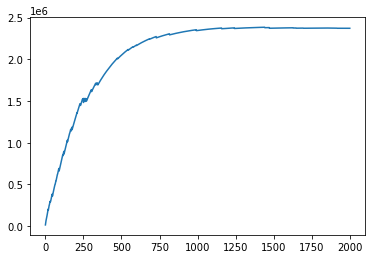

In [15]:
# Testing
current_state = node_counter
steps = [current_state]

while current_state not in term_nodes:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [17]:
%%time

for step in steps:
    for state in state_lookup:
        if state_lookup[state] == step:
            print(state)

level1_(1,)
level2_(1, 1)
level3_(1, 1, 1)
level4_(1, 1, 1, 1)
level5_(1, 1, 1, 1, 1)
level6_(1, 1, 1, 1, 1, 1)
level7_(1, 1, 1, 1, 1, 1, 0)
level8_(1, 1, 1, 1, 1, 1, 0, 0)
level9_(1, 1, 1, 1, 1, 1, 0, 0, 0)
level10_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0)
level11_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
level12_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
level13_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)
level14_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
level15_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level16_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level17_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level18_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level19_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level20_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
level21_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)
level22_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
level23_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 